# VSM

## .datファイルを.csvに変換、編集
### ファイル名：20210107 Ni Ba122 SUS PICT 900 48 h.dat

In [1]:
import re
import csv

def data_read(path, mode, filename, contents):
    with open(path, mode) as f1:
        with open(filename, 'a', newline="") as f2:
            row = f1.readline()
            writer = csv.writer(f2)
            t = 1
            while row:
                if t > 40:
                    if contents:
                        print("number:"+str(t))
                        print("---- Row data ----")
                        print("Type of ""data"":{}".format(type(row)))
                        print(row)
                    
                    s = row.split(',')
                    if contents:
                        print("配列の個数"+str(len(s)))
                    writer.writerow(s[2:5])
                row = f1.readline()
                t = t + 1
        
#ファイル名の設定
def data_create(path):
    namepath = path.split('.')
    name = namepath[len(namepath)-2].split('/')
    filename = 'VSM_Data_Edited/'+name[len(name)-1]+'.csv'
    with open(filename, 'w') as f:
        f.write('')
        print(name[len(name)-1] + ' was created!')
        print(filename)
    return filename

if __name__=="__main__":
    path = 'Data/filename.dat'
    mode = "r"
    filename = data_create(path)
    data_read(path, mode, filename, False)

20210107 Ni Ba122 SUS PICT 900 48 h was created!
VSM_Data_Edited/20210107 Ni Ba122 SUS PICT 900 48 h.csv


### $\chi-T$グラフ
#### 仮グラフ作成

In [7]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

plt.rcParams['font.family'] = 'IPAexGothic'
plt.rcParams['font.size'] = 10

df = pd.read_csv('VSM_Data_Edited/filename.csv', header = 0)
df.columns.values.tolist()

['Temperature (K)', 'Magnetic Field (Oe)', 'Moment (emu)']

0.0009537699840000002


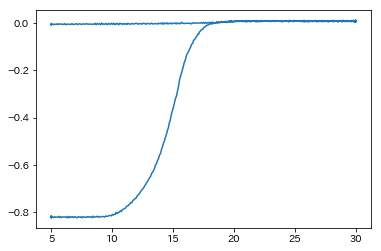

In [8]:
#材料のa,b,v
a = 0
b = 0
c = 0
V = a*b*c
print(V)
df = df.loc[: ,'Temperature (K)': 'Moment (emu)']
df_kai = pd.DataFrame()
df_kai = df[(df["Magnetic Field (Oe)"] < 11) & (df["Magnetic Field (Oe)"] > 10)].copy()
plt.plot(df_kai["Temperature (K)"], 4*np.pi*df_kai["Moment (emu)"]/df_kai["Magnetic Field (Oe)"]/V) 

df_kai['4piM_H'] = 4*np.pi*df_kai["Moment (emu)"]/df_kai["Magnetic Field (Oe)"]/V
#df_kai.to_csv('VSM_Result/No.2 900 48h kai.csv', header=True, index=False, columns=['Temperature (K)', '4piM_H'])

## ${T_{c}}^{mag}(K)$

In [9]:
from sympy.geometry import *

df_kai['4piM_H'] = -df_kai['4piM_H']/df_kai['4piM_H'].min()
for j in range(len(df_kai)):
    df_p = df_kai.iloc[[j, j+1]][['Temperature (K)', '4piM_H']]
    x1, x2, y1, y2 = df_p.iloc[0,0], df_p.iloc[1,0], df_p.iloc[0,1], df_p.iloc[1,1]
    y3 = 0*x1-0.1
    y4 = 0*x2-0.1
    tc = (x1 - x2) * (y3 - y1) + (y1 - y2) * (x1 - x1)
    td = (x1 - x2) * (y4 - y1) + (y1 - y2) * (x1 - x2)
    if tc*td<0:
        break
s1 = Segment((x1, y1),(x2,y2)) 
s2 = Segment((x1, y3),(x2,y3))
result = s1.intersection(s2)
print(float(result[0].x))

16.634817208379474


### $M-H$グラフ
#### 仮グラフ

1412


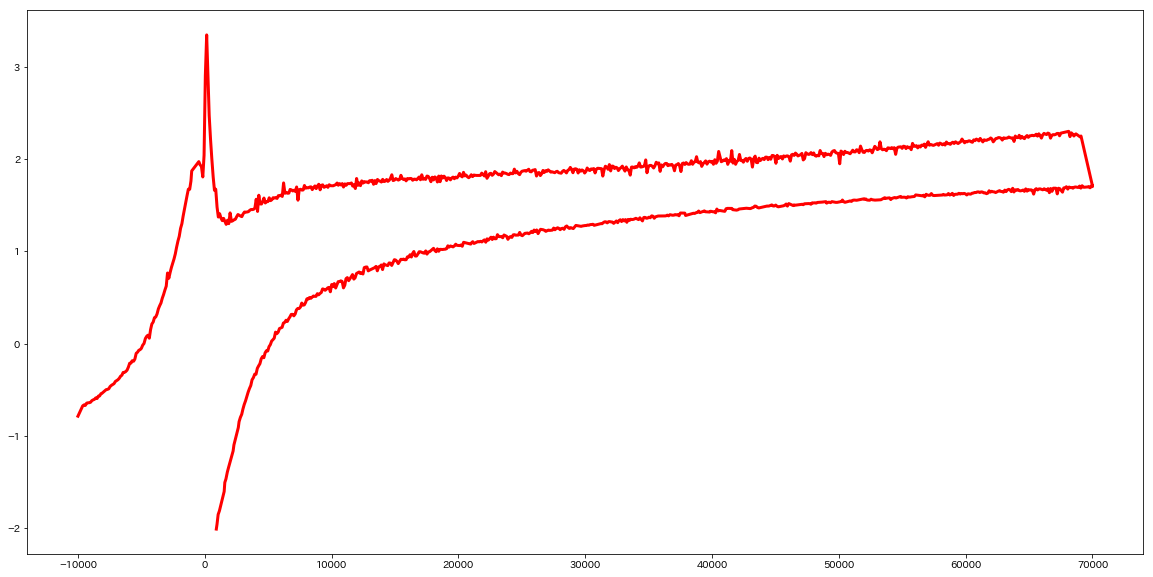

In [10]:
df_MH = pd.DataFrame()
df_MH = df[((df['Magnetic Field (Oe)'] > 20) | (df['Magnetic Field (Oe)'] < 9))]
fig = plt.figure(figsize = (20, 10))
fig.patch.set_edgecolor('k')
fig.subplots_adjust(hspace = 0.5)
ax1 = fig.add_subplot(111)
#ax1.plot(df_MH['Magnetic Field (Oe)'], df_MH["Moment (emu)"]/V, color = 'blue', label = 'No.1 (700°C 48 h)', marker = '.', markersize = '10', markerfacecolor = 'blue', mew = 0, linewidth = 1, clip_on = False)
e = np.arange(1492, 1551, 1).tolist()
df_MH_edited = df_MH.drop([999, 1010, 1021, 1056, 1117, 1326, 1332, 1360, 1026, 1031, 1048, 1071, 1086, 1085, 1096, 1076
                   ,1108, 1136, 1143, 1159, 1161, 1165, 1168, 1188, 1205, 1208, 1220, 1255, 1261, 1279, 1286, 1313
                   ,1336, 1338, 1343, 1347, 1373, 1377, 1385, 1395, 1416, 1639, 1660, 1915, 1450, 1465, 1477, 1946
                   ,1951, 1954, 1971, 1974, 1995, 2008, 2009, 2203, 2192]).drop(e)

print(len(df_MH))
df_MH_error = df_MH_edited.iloc[540: 590][['Magnetic Field (Oe)', "Moment (emu)"]]

from matplotlib.font_manager import FontProperties
f_Calibri = FontProperties(fname=r'C:\WINDOWS\Fonts\Calibri.ttf')
f_Calibrib = FontProperties(fname=r'C:\WINDOWS\Fonts\Calibrib.ttf')
f_Calibriz = FontProperties(fname=r'C:\WINDOWS\Fonts\calibriz.ttf')



#error除去
#for i in range(50):
    #ax1.text(df_MH_error.iloc[i, 0]+100, df_MH_error.iloc[i, 1]/V, str(df_MH_error.iloc[[i]].index[0]), fontproperties = f_Calibrib, fontsize = 10, ha = 'center', va = 'center', rotation = 0)
#ax1.plot(df_MH_error['Magnetic Field (Oe)'], df_MH_error["Moment (emu)"]/V, color = 'blue', label = 'No.1 (700°C 48 h)', marker = '.', markersize = '10', markerfacecolor = 'blue', mew = 0, linewidth = 0, clip_on = False) 
ax1.plot(df_MH_edited['Magnetic Field (Oe)'], df_MH_edited["Moment (emu)"]/V, color = 'red', label = 'No.1 (700°C 48 h)', marker = '.', markersize = '0', markerfacecolor = 'red', mew = 0, linewidth = 3, clip_on = False)
df_MH_csv = df_MH_edited.copy()
df_MH_csv["Moment (emu)"] = df_MH_csv["Moment (emu)"]/V
df_MH_csv.to_csv('VSM_Result/No 2 900 48h MH.csv', header=True, index=False)

### $J_c$の計算

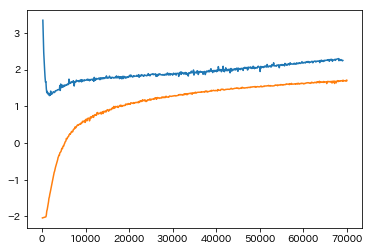

In [12]:
df_MH_plus = df_MH_edited[(df_MH_edited['Magnetic Field (Oe)'] > 50)].copy()
df_MH_minus = df_MH_edited[(df_MH_edited['Magnetic Field (Oe)'] < 0)].copy()
df_MH_minus['Magnetic Field (Oe)'] = -df_MH_minus['Magnetic Field (Oe)']
df_MH_minus['Moment (emu)'] = -df_MH_minus['Moment (emu)']

df_MH_upper = pd.DataFrame()
df_MH_under = pd.DataFrame()
df_MH_under_n = pd.DataFrame()

df_MH_upper = df_MH_plus.loc[df_MH_plus['Magnetic Field (Oe)'].idxmax()+1: , :]
df_MH_upper = df_MH_upper.round({"Magnetic Field (Oe)": -2})
df_MH_upper = df_MH_upper.sort_values(by='Magnetic Field (Oe)')
df_MH_upper = df_MH_upper.drop('Temperature (K)', axis=1)

df_MH_under_n = df_MH_plus.loc[: df_MH_plus['Magnetic Field (Oe)'].idxmax()-1, :]
df_MH_minus = df_MH_minus[(df_MH_minus['Moment (emu)'] < df_MH_under_n['Moment (emu)'].min())]
df_MH_under = pd.concat([df_MH_minus, df_MH_under_n])
df_MH_under = df_MH_under.round({"Magnetic Field (Oe)": -2})
df_MH_under = df_MH_under.sort_values(by='Magnetic Field (Oe)')
df_MH_under = df_MH_under.drop('Temperature (K)', axis=1)

plt.plot(df_MH_upper["Magnetic Field (Oe)"], df_MH_upper["Moment (emu)"]/V)
plt.plot(df_MH_under["Magnetic Field (Oe)"], df_MH_under["Moment (emu)"]/V)

df_Mjc = pd.DataFrame()
df_Mjc = pd.merge(df_MH_upper, df_MH_under, on = "Magnetic Field (Oe)")
df_Mjc['jc'] = 20*(df_Mjc["Moment (emu)_x"] - df_Mjc["Moment (emu)_y"])/(a * (1 - (a / 3 / b)))/V
df_Mjc.to_csv('VSM_Result/No 2 900 48h jc.csv', header=True, index=False, columns=['Magnetic Field (Oe)', 'jc'])
df_Mjc['Moment (emu)_x'] = df_Mjc['Moment (emu)_x']/V
df_Mjc['Moment (emu)_y'] = df_Mjc['Moment (emu)_y']/V
df_Mjc.to_csv('VSM_Result/No 2 900 48h Mave.csv', header=True, index=False, columns=['Magnetic Field (Oe)', 'Moment (emu)_x', 'Moment (emu)_y'])


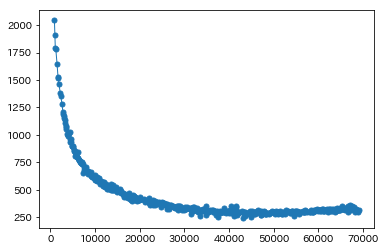

In [184]:
plt.plot(df_Mjc["Magnetic Field (Oe)"], 20*(df_Mjc["Moment (emu)_x"] - df_Mjc["Moment (emu)_y"])/(a * (1 - (a / 3 / b)))/V, marker = '.', markersize = '10', linewidth = 1)